# Predicting House Price 

This my first Notebook in Kaggle. 

This python notebook tries to solve Predicting the Housing Price, a Kaggle Competitions!

In [1]:
# As usual let us start by importing the commonly used libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings 

warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm, skew

In [2]:
# Let us read the training and testing  datasets 
D_train = pd.read_csv('train.csv')
D_test = pd.read_csv('test.csv')

In [3]:
print("The shape of the training data is {}".format(D_train.shape))
print("The shape of the testing data is {}".format(D_test.shape))

The shape of the training data is (1460, 81)
The shape of the testing data is (1459, 80)


In [4]:
#Let us print some of the rows in the training and test data data 
D_train[0:6]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [5]:
# test data
D_test[0:6]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


# Data Transormation and Cleaning 

We need to transform the data (for example use log transform  for linear models) detect and clean (correct) unnessary data.  
Below are the main processes (** 4 C's**)  I am going to  do!

1. Correcting (unusual values and outliers) 
2. Completing (missing values/info.)
3. Creating (new features for training) and
4. Converting (fields to the correct format). 

These four steps are the **4 C's**

First we start with the target variable, **SalePrice**


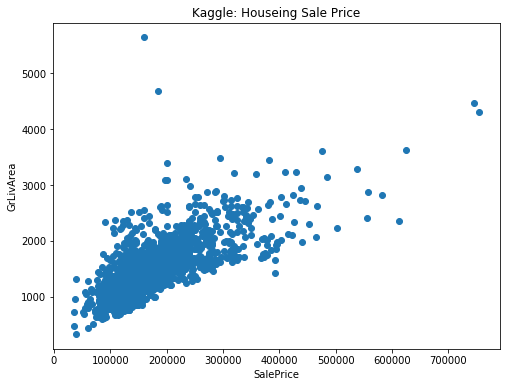

In [6]:
fig = plt.figure(figsize=(8,6))
plt.scatter(D_train['SalePrice'], D_train['GrLivArea'])
plt.ylabel('GrLivArea')
plt.xlabel('SalePrice')
plt.title('Kaggle: Houseing Sale Price')
plt.show()

We observe that there are two low  SalePrices whose GrLivArea is large,  these are outliers and must be removed!





In [7]:
D_train = D_train.drop(D_train[(D_train['GrLivArea']>4000) & (D_train['SalePrice']<800000)].index)

In [8]:
print("The Shape of the training data after removing this outlier is {}".format(D_train.shape))

The Shape of the training data after removing this outlier is (1456, 81)


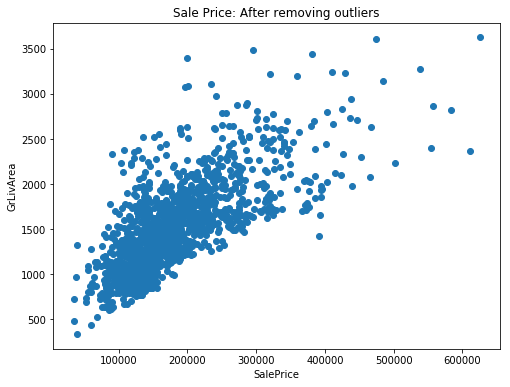

In [9]:
# plot GrLivArea vs 'SalePrice' after removing outliers 

fig = plt.figure(figsize=(8,6))
plt.scatter(D_train['SalePrice'], D_train['GrLivArea'])
plt.ylabel('GrLivArea')
plt.xlabel('SalePrice')
plt.title('Sale Price: After removing outliers')
plt.show()


 ## Now let us plot and see the traget variable

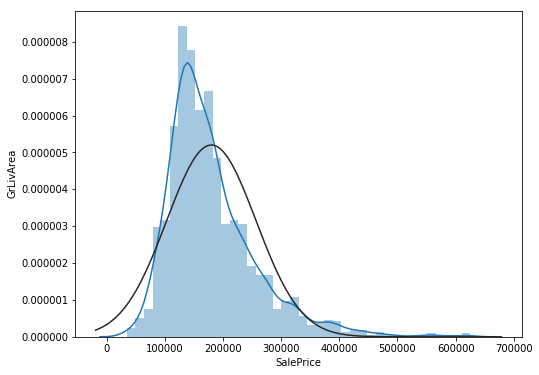

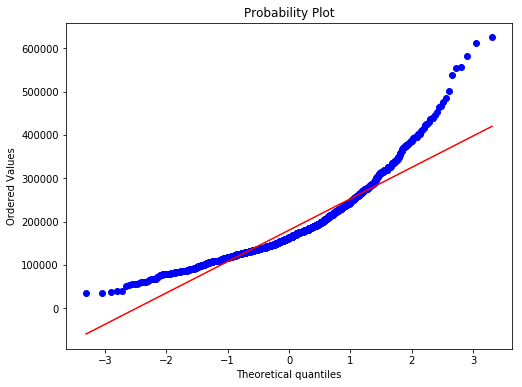

The mean and width of the house price distribution 180151.23 and  76670.25 are 


In [10]:
#The target (house price) distribution plot 
fig = plt.figure(figsize=(8,6))
sns.distplot(D_train['SalePrice'] , fit=norm);
plt.ylabel('GrLivArea')
plt.xlabel('SalePrice')
plt.show()


fig = plt.figure(figsize=(8,6))
res = stats.probplot(D_train['SalePrice'], plot=plt)
(mu, sigma) = norm.fit(D_train['SalePrice'])
plt.show()
print ( "The mean and width of the house price distribution {:.2f} and  {:.2f} are ".format(mu, sigma))

We observe that the target variable is not quite normaly distributed and is some what  right skewed. We must log transofrom the target variable and see if it improves the distribution 


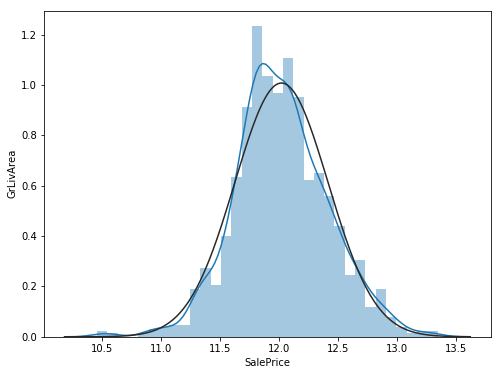

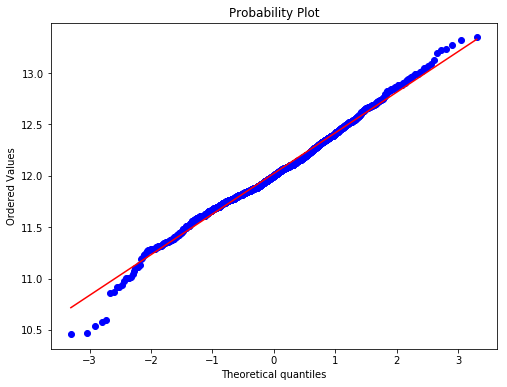

The mean and width of the house price distribution 12.02 and  0.40 are 


In [11]:
#The targe (house price)  distribution plot after log transform   
fig = plt.figure(figsize=(8,6))
logSalePrice=np.log1p(D_train['SalePrice'])
sns.distplot(logSalePrice , fit=norm);
plt.ylabel('GrLivArea')
plt.xlabel('SalePrice')
plt.show()


fig = plt.figure(figsize=(8,6))
res = stats.probplot(logSalePrice, plot=plt)
(mu, sigma) = norm.fit(logSalePrice)
plt.show()


print ( "The mean and width of the house price distribution {:.2f} and  {:.2f} are ".format(mu, sigma))

In [12]:
(mu, sigma) = norm.fit(logSalePrice)
print ( "The mean and width of the house price distribution \n after log transform  are:  {:.2f} and  {:.2f},  respectively ".format(mu, sigma))

The mean and width of the house price distribution 
 after log transform  are:  12.02 and  0.40,  respectively 


Awesome! we observe that the log transform has improved the distribution of the housing price 


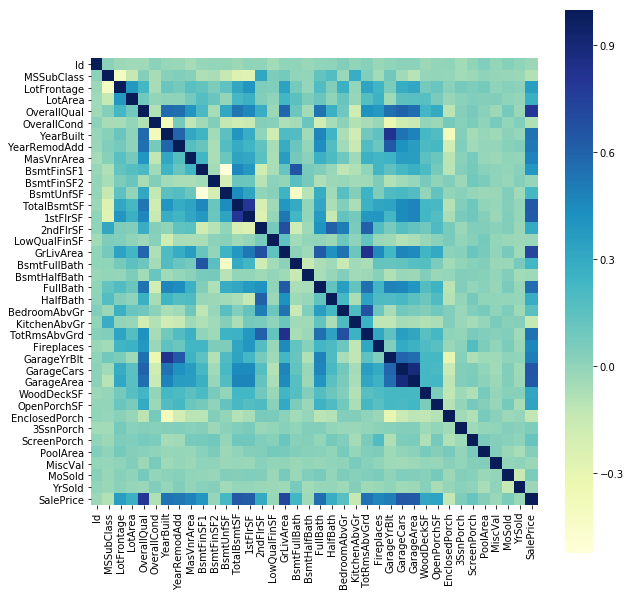

In [13]:
# calculate and map the correlation matrix 
fig = plt.figure(figsize=(10,10))
corrmatrix = D_train.corr()
sns.heatmap(corrmatrix, square=True, cmap="YlGnBu")
plt.show()

This correlation matrix plot is very useful to see the correlation relationship between the target variable and all  predictors as well the correlation betwwen any pair of predictors among themseveles. For example loooking at the right edge of the map above we clearly see that target varib le (house price) is highly correlated with predictors **OverallQual, GrLivArea, TotalBsmtSF, GarageCars, GarageArea ** and so on. Constant or nearly constant  rows(columns) represent missing value or useless data and must be cleaned. We,  also,  need to be careful about two two highly correlated predictors.   

# Cleaning Missing Data

We need to identify and clean missing data.  If a large portion of a variable is missing we will remove the varibales totally. If a small porttion of the data is missing we should imploy certain interpolation or estimation technique to fill the gap.

Note the ID parameter is not important and must be removed before predicting.

Before that let us megre teh training and test data. 



<function matplotlib.pyplot.show>

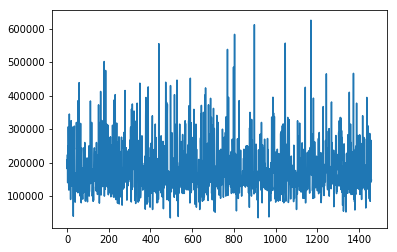

In [14]:
#Keep the target first 
var_target=D_train['SalePrice']
varIdtrain=D_train['Id']
varIdtest=D_test['Id']

#check SalePrice 
plt.plot(var_target)
plt.show



In [15]:
# Drop the target and ID variables 

D_train=D_train.drop('SalePrice',axis=1)
D_train=D_train.drop('Id', axis=1)
D_test=D_test.drop('Id', axis=1)


#Merge the D_train and D_test

DataAll=pd.concat((D_train, D_test)).reset_index(drop=True)
print("Shape of the combined data is: {}".format(DataAll.shape))

Shape of the combined data is: (2915, 79)


In [16]:
# let us see the amount of missing data for each variable 
total = DataAll.isnull().sum().sort_values(ascending=False)
# percent = (DataAll.isnull().sum()/DataAll.isnull().count()).sort_values(ascending=False)*100
# missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# missing_data.head(30)

In [17]:
print(" The number of missing values for each predictor are: \n {}".format(total.head(40)))

 The number of missing values for each predictor are: 
 PoolQC          2907
MiscFeature     2810
Alley           2717
Fence           2345
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior1st        1
SaleType           1
Electrical         1
KitchenQual        1
GarageArea         1
GarageCars         1
OverallQual        0
OverallCond        0
LotArea            0
Street             0
LotShape           0
LandContour        0
dtype: int64


In [18]:
#Check if the target itself has a missing value 
print("The number of missing values for the target: {}".format(var_target.isnull().sum()))

The number of missing values for the target: 0


Great! let us now deal with each predictor that has missing value 


In [19]:
#PoolQC, MiscFeature, Alley, Fence, FireplaceQu, NA values mean, that paramer is not available 
#so we replace by None 
DataAll["PoolQC"] = DataAll["PoolQC"].fillna("None")
DataAll["MiscFeature"] = DataAll["MiscFeature"].fillna("None")
DataAll["Alley"] = DataAll["Alley"].fillna("None")
DataAll["Fence"] = DataAll["Fence"].fillna("None")
DataAll["FireplaceQu"] = DataAll["FireplaceQu"].fillna("None")


# For LotFrontage,  use the neghbourhood value

DataAll["LotFrontage"] = DataAll.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

#Replace the following varaibles with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    DataAll[col] = DataAll[col].fillna('None')
    
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    DataAll[col] = DataAll[col].fillna(0)
  #reolace missing values with zero   
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    DataAll[col] = DataAll[col].fillna(0)    
  #NaN means no basement   
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    DataAll[col] = DataAll[col].fillna('None')
    
DataAll["MasVnrType"] = DataAll["MasVnrType"].fillna("None")
DataAll["MasVnrArea"] = DataAll["MasVnrArea"].fillna(0)   

DataAll['MSZoning'] = DataAll['MSZoning'].fillna(DataAll['MSZoning'].mode()[0])

DataAll = DataAll.drop(['Utilities'], axis=1)

DataAll["Functional"] = DataAll["Functional"].fillna("Typ")

DataAll['Electrical'] = DataAll['Electrical'].fillna(DataAll['Electrical'].mode()[0])

DataAll['KitchenQual'] = DataAll['KitchenQual'].fillna(DataAll['KitchenQual'].mode()[0])


DataAll['Exterior1st'] = DataAll['Exterior1st'].fillna(DataAll['Exterior1st'].mode()[0])

DataAll['Exterior2nd'] = DataAll['Exterior2nd'].fillna(DataAll['Exterior2nd'].mode()[0])


DataAll['SaleType'] = DataAll['SaleType'].fillna(DataAll['SaleType'].mode()[0])

DataAll['MSSubClass'] = DataAll['MSSubClass'].fillna("None")


In [20]:
# Let us check if there is any missing data 
#print(DataAll.isnull().sum().sort_values(ascending=False))
print("The number of miising values now is{}".format(DataAll.isnull().sum().max()))

The number of miising values now is0


In [21]:
#Let us now convert categorical variables into dummy variables
DataAll = pd.get_dummies(DataAll)

print("The number of dimesion of the all data after dummy conversion : {}".format(DataAll.shape))

The number of dimesion of the all data after dummy conversion : (2915, 299)


In [22]:
#Now let us partition DataAll into the training and testing 

D_train=DataAll[:len(varIdtrain)]
D_test=DataAll[len(varIdtrain):]

In [23]:
# It is time to import Our machine learning method 
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb


#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(D_train.values)
    rmse= np.sqrt(-cross_val_score(model, D_train.values, logSalePrice, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)




In [24]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

#KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=4, coef0=2.5)

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)





def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))



In [25]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1121 (0.0064)



In [26]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1122 (0.0065)



In [27]:
#score = rmsle_cv(KRR)
#print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [28]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1173 (0.0077)



In [29]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1159 (0.0046)



In [30]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1170 (0.0077)



In [31]:
# Stacking 
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 
    

In [32]:
averaged_models = AveragingModels(models = (ENet, GBoost,model_xgb, model_lgb, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1089 (0.0060)



In [33]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1173 (0.0077)



In [34]:
ave_models=averaged_models.fit(D_train, logSalePrice)
ave_train_pred=np.expm1(ave_models.predict(D_train))
ave_pred = np.expm1(ave_models.predict(D_test))
print(rmsle(logSalePrice, ave_train_pred))

#ave_pred_train=np.expm1(xgb_train_pred)
ave_targ_train=np.expm1(logSalePrice)

cc_ave=np.corrcoef(ave_train_pred,ave_targ_train)
print(cc_ave)

193953.6725984761
[[1.        0.9849775]
 [0.9849775 1.       ]]


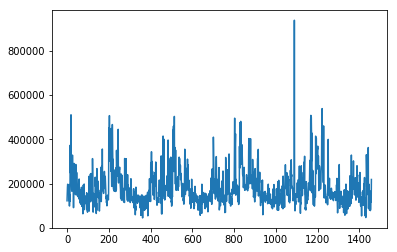

In [35]:
plt.plot(ave_pred)
plt.show()

In [36]:
mdlxg=model_xgb.fit(D_train, logSalePrice)
xgb_train_pred = mdlxg.predict(D_train)
xgb_pred = np.expm1(mdlxg.predict(D_test))
print(rmsle(logSalePrice, xgb_train_pred))

pred_train=np.expm1(xgb_train_pred)
targ_train=np.expm1(logSalePrice)


0.07863595697135344


In [37]:
cc_ta=np.corrcoef(pred_train,targ_train)

In [38]:
cc_ta

array([[1.        , 0.98042862],
       [0.98042862, 1.        ]])

In [39]:
mdlRF=GBoost.fit(D_train, logSalePrice)
RF_train_pred=mdlRF.predict(D_train)

In [40]:
#plt.figure()
cc_RF=np.corrcoef(np.expm1(RF_train_pred),np.expm1(logSalePrice))
print("The Random Forest correlation coefficient is {}".format(cc_RF))

The Random Forest correlation coefficient is [[1.         0.99542372]
 [0.99542372 1.        ]]


In [41]:
resultRF=np.expm1(mdlRF.predict(D_test))
resultXGB=xgb_pred

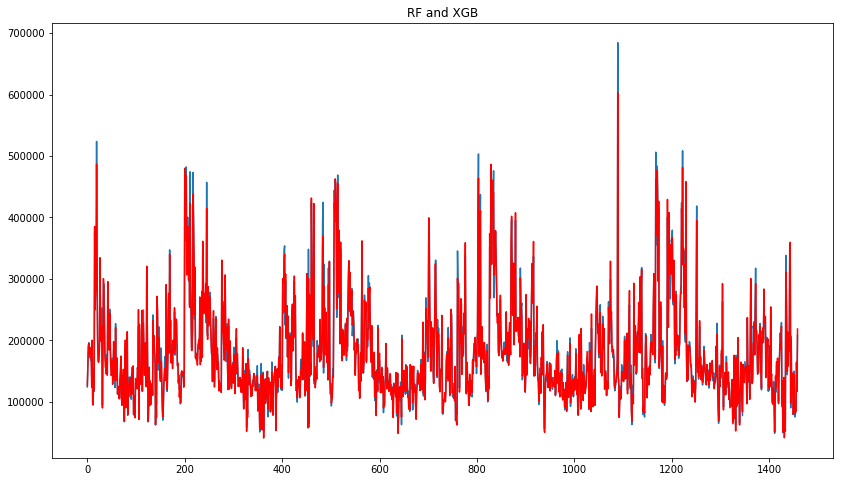

In [42]:
plt.figure(figsize=(14,8))
plt.plot(resultRF,label='RF')
plt.plot(xgb_pred,'r', label='XBoost')
plt.title('RF and XGB')
plt.show()

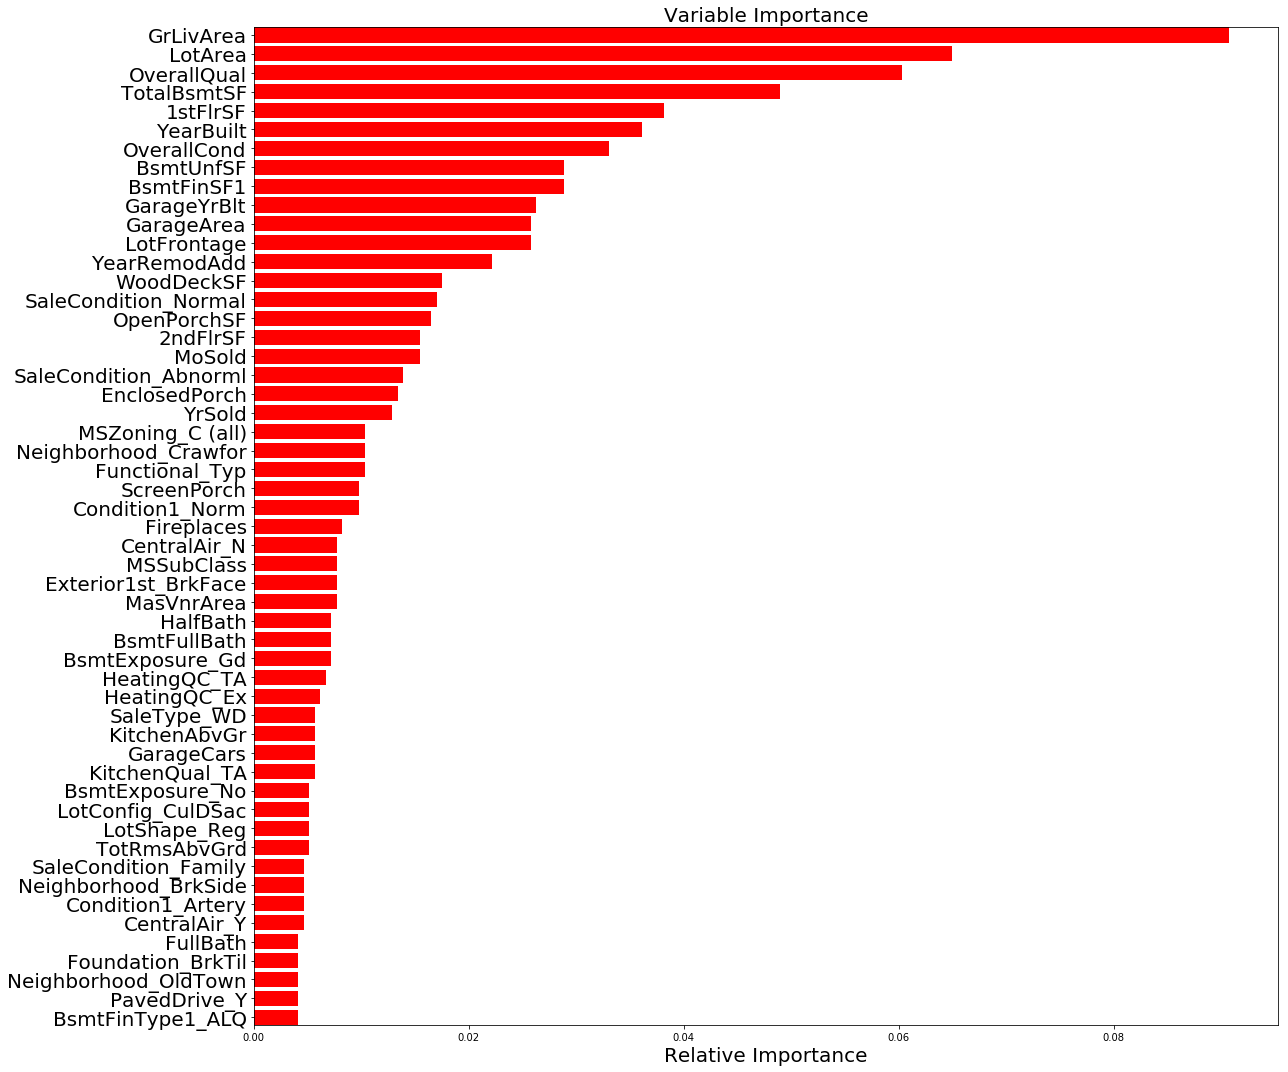

In [50]:
# Variable Importance 
var_importance=model_xgb.feature_importances_
important_idx = np.where(var_importance > 0)
important_var = D_train.columns[important_idx]
sorted_idx = np.argsort(var_importance[important_idx])[::1]
var_importance=var_importance[important_idx]
sorted_var=important_var[sorted_idx]
sorted_var_importance=var_importance[sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + -.5
plt.figure(figsize=(18, 15))
plt.barh(pos[100:], sorted_var_importance[100:], color='red',align='center')
plt.yticks(pos[100:], sorted_var[100:],fontsize=20)
plt.xlabel('Relative Importance',fontsize=20)
plt.title('Variable Importance',fontsize=20)
plt.margins(y=0)
plt.tight_layout()
#plt.savefig('VariableImportance.eps', facecolor='w', format='eps', dpi=1000)
plt.show()